   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Column Names: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
    

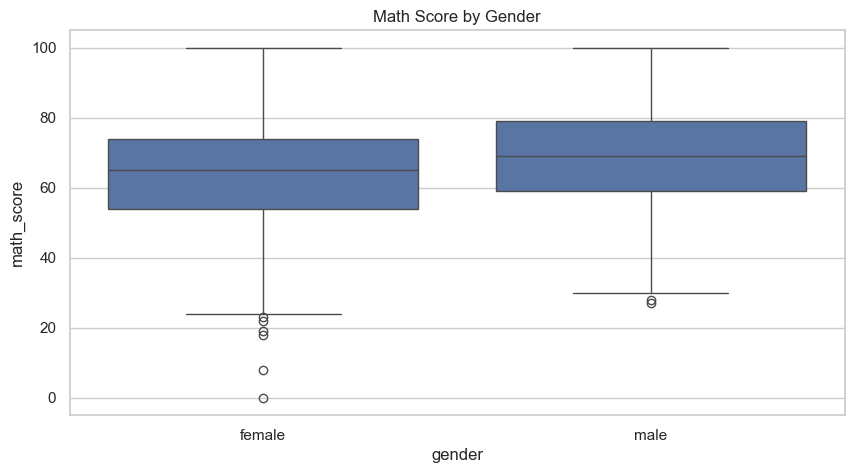

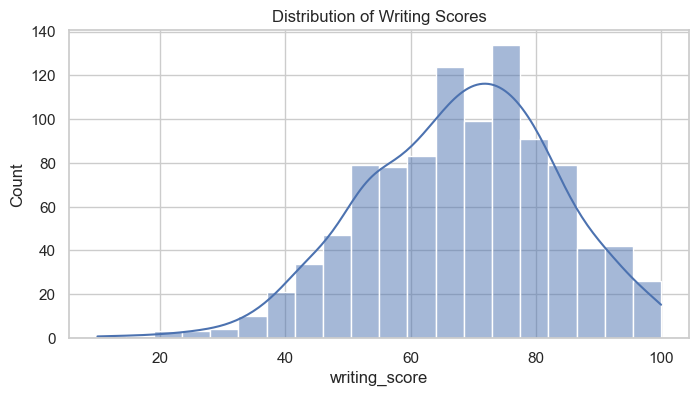

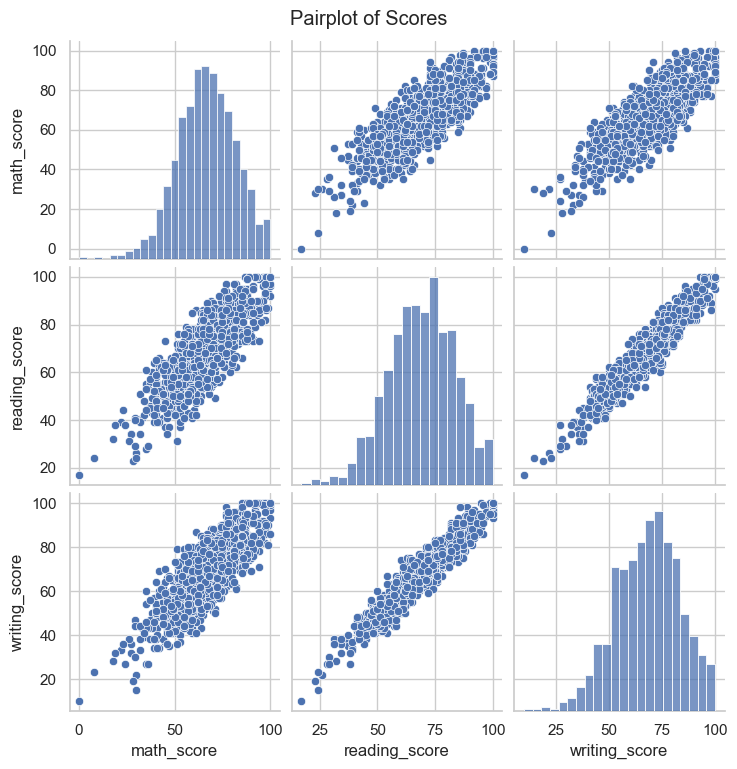

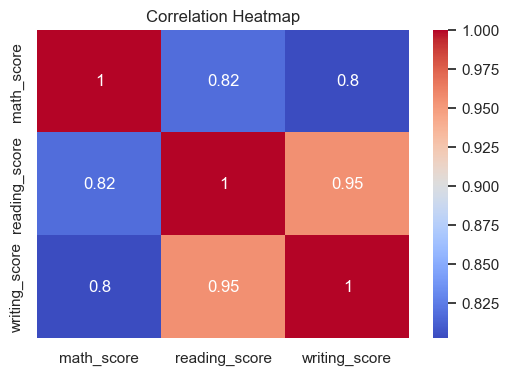

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('StudentsPerformance.csv')

# 2. Preview the dataset
print(df.head())
print("\nColumn Names:", df.columns)

# 3. Normalize column names (optional cleanup)
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# 4. Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# 5. Convert score columns to numeric (if needed)
score_cols = ['math_score', 'reading_score', 'writing_score']
for col in score_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 6. Basic statistics
print("\nDescriptive Stats:\n", df[score_cols].describe())

# 7. Value counts for categorical data
print("\nGender Distribution:\n", df['gender'].value_counts())
print("\nParental Level of Education:\n", df['parental_level_of_education'].value_counts())

# 8. Visualizations
sns.set(style="whitegrid")

# Boxplot of scores by gender
plt.figure(figsize=(10, 5))
sns.boxplot(x='gender', y='math_score', data=df)
plt.title("Math Score by Gender")
plt.show()

# Histogram of writing scores
plt.figure(figsize=(8, 4))
sns.histplot(df['writing_score'], kde=True, bins=20)
plt.title("Distribution of Writing Scores")
plt.show()

# Pairplot to observe relationships
sns.pairplot(df[score_cols])
plt.suptitle("Pairplot of Scores", y=1.02)
plt.show()

# 9. Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[score_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
